In [1]:
import os.path as osp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

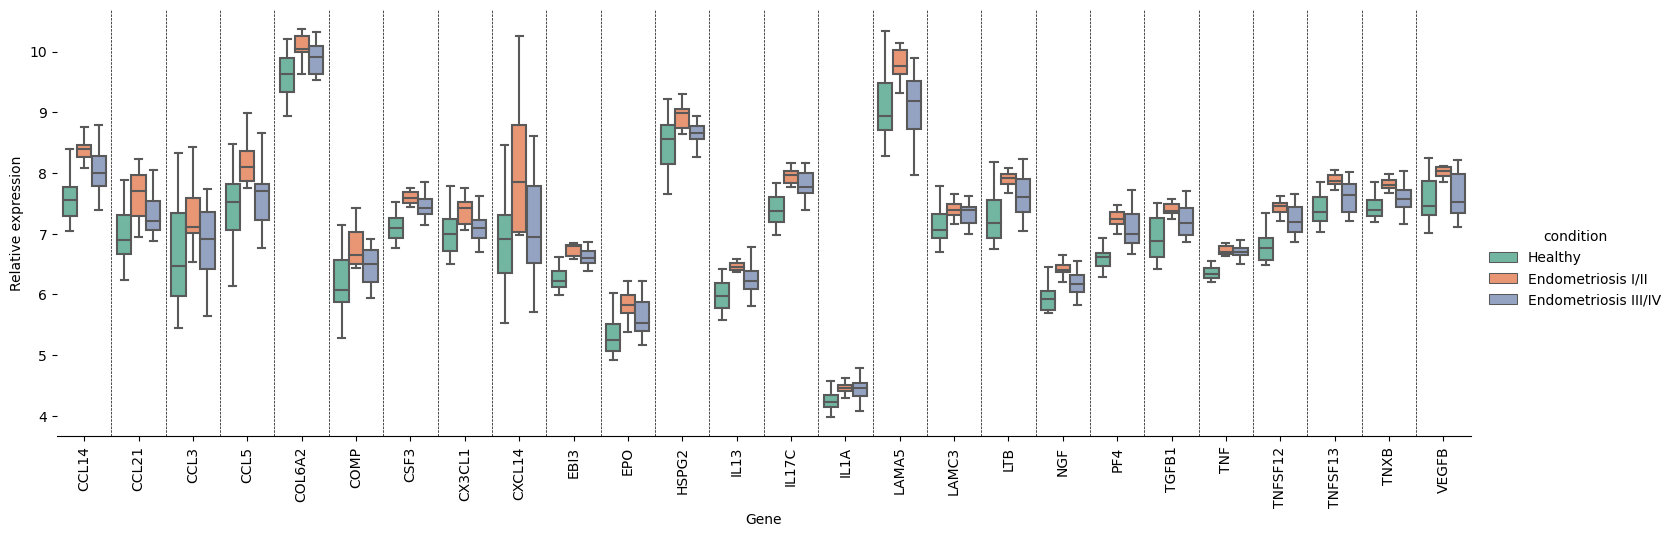

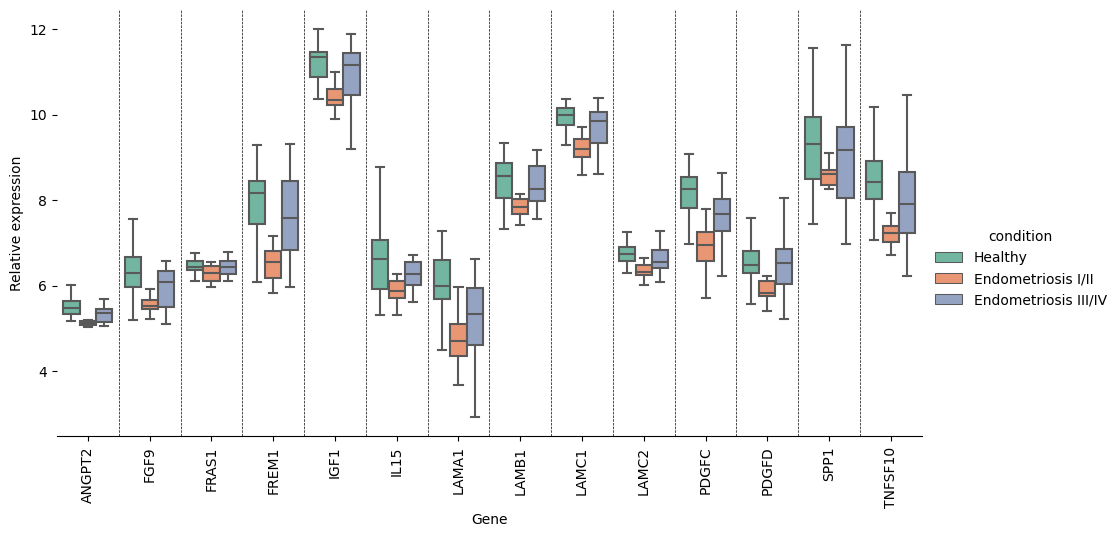

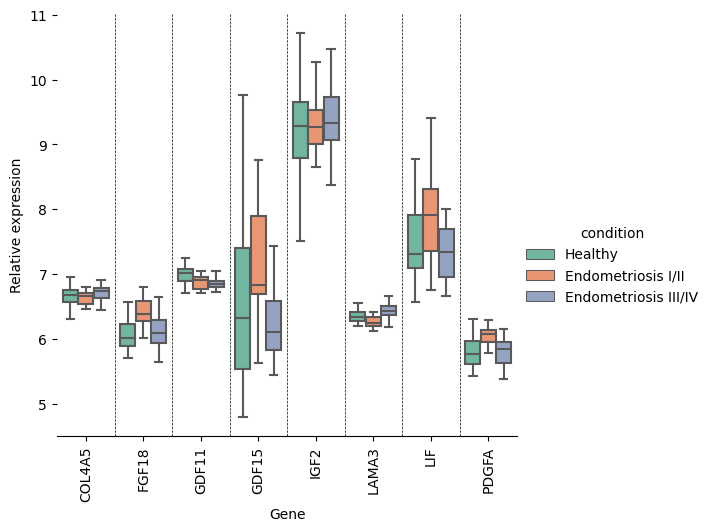

In [2]:
aspect_per_pattern = {
    'mountain': 3,
    'valley': 1.9,
    'other': 1.1
}

for pattern in ["mountain", "valley", "other"]:
    # Load data
    healthy = pd.read_csv(osp.join(pattern, 'healthy_counts.tsv'), sep='\t', index_col='symbol')
    mild_endo = pd.read_csv(osp.join(pattern, 'mild_endometriosis_counts.tsv'), sep='\t', index_col='symbol')
    severe_endo = pd.read_csv(osp.join(pattern, 'severe_endometriosis_counts.tsv'), sep='\t', index_col='symbol')

    healthy_long = healthy.stack().reset_index().rename(columns={'level_1': 'sample', 0: 'expression'})
    healthy_long['condition'] = 'Healthy'

    mild_endo_long = mild_endo.stack().reset_index().rename(columns={'level_1': 'sample', 0: 'expression'})
    mild_endo_long['condition'] = 'Endometriosis I/II'

    severe_endo_long = severe_endo.stack().reset_index().rename(columns={'level_1': 'sample', 0: 'expression'})
    severe_endo_long['condition'] = 'Endometriosis III/IV'

    data = pd.concat([healthy_long, mild_endo_long, severe_endo_long])

    # Plot
    g = sns.catplot(kind="box", data=data, x='symbol', y='expression', hue='condition', height=5,
                    aspect=aspect_per_pattern[pattern], sym='', palette='Set2')
    g.despine(left=True)
    plt.xticks(rotation=90)
    plt.xlabel('Gene')
    plt.ylabel('Relative expression')

    # Get unique gene symbols
    unique_symbols = data['symbol'].unique()
    mid_positions = np.arange(0.5, len(unique_symbols))

    # Draw vertical lines as dividers
    for pos in mid_positions:
        plt.axvline(x=pos, color='black', linestyle='--', lw=0.5)
    
    plt.show()